# State of Data Science: exploring the Kaggle 2017 Survey

A Kaggle Machine Learing and Data Science 2017 Survey está dividida em três datasets:

- ___multipleChoiceResponses.csv:___ contendo todas as respostas às perguntas de múltipla escolha armazenadas não randomicamente, mantendo as respostas do mesmo entrevistado em uma única linha
- ___freeformResponses.csv:___ contém todas as respostas às perguntas abertas armazenadas randomicamente, sendo que em uma linha as respostas não correspondem ao mesmo entrevistado
- ___conversionRates.csv:___ contém a conversão de todas as moedas presentes na pesquisa para USD

De acordo com o resumo fornecido pelo Kaggle, temos algumas informações contextualizando o dataset: 

- Foram computadas mais de 16.000 respostas à pesquisa em 171 países
- Países com menos de 50 respostas à pesquisa foram agrupados, aparecendo como 'Other' no dataset
- Com intuito de aumentar a relevância da pesquisa, perguntas diferentes foram feitas à cada entrevistado dependendo da sua situação empregatícia
- Não existe uma chave para ligar as respostas abertas às respostas fechadas

Sendo assim, a análise será feita apenas com as questões de múltipla escolha.

### Motivação

Inicialmente, o intuito dessa análise seria explorar a disparidade de gênero dentro do campo de ciência de dados, mas existem alguns dados interessantes a serem explorados onde não seria relevante aplicar a separação em gêneros, como por exemplo linguagem mais utilizada. E sem um meio de ligar as respostas abertas ao seu interlocutor, perde-se um pouco do potencial de análise da disparidade.

Então irei explorar os dados de uma maneira mais geral, focando na disparidade de gêneros apenas quando relevante :)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
schema = pd.read_csv('../data/schema.csv')
multiple_choice_df = pd.read_csv('../data/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
conversion_rates = pd.read_csv('../data/conversionRates.csv')

In [3]:
schema['Asked'].unique()

array(['All', 'Non-worker', 'Non-switcher', 'Worker1', 'Learners',
       'OnlineLearners', 'Worker', 'CodingWorker-NC', 'CodingWorker'],
      dtype=object)

## Basic General Analysis

Número total de entrevistados: 16716
Número total de países contabilizados: 52
Número de países classificados como 'Other': 119

País com o maior número de entrevistados: United States com 4197 entrevistados



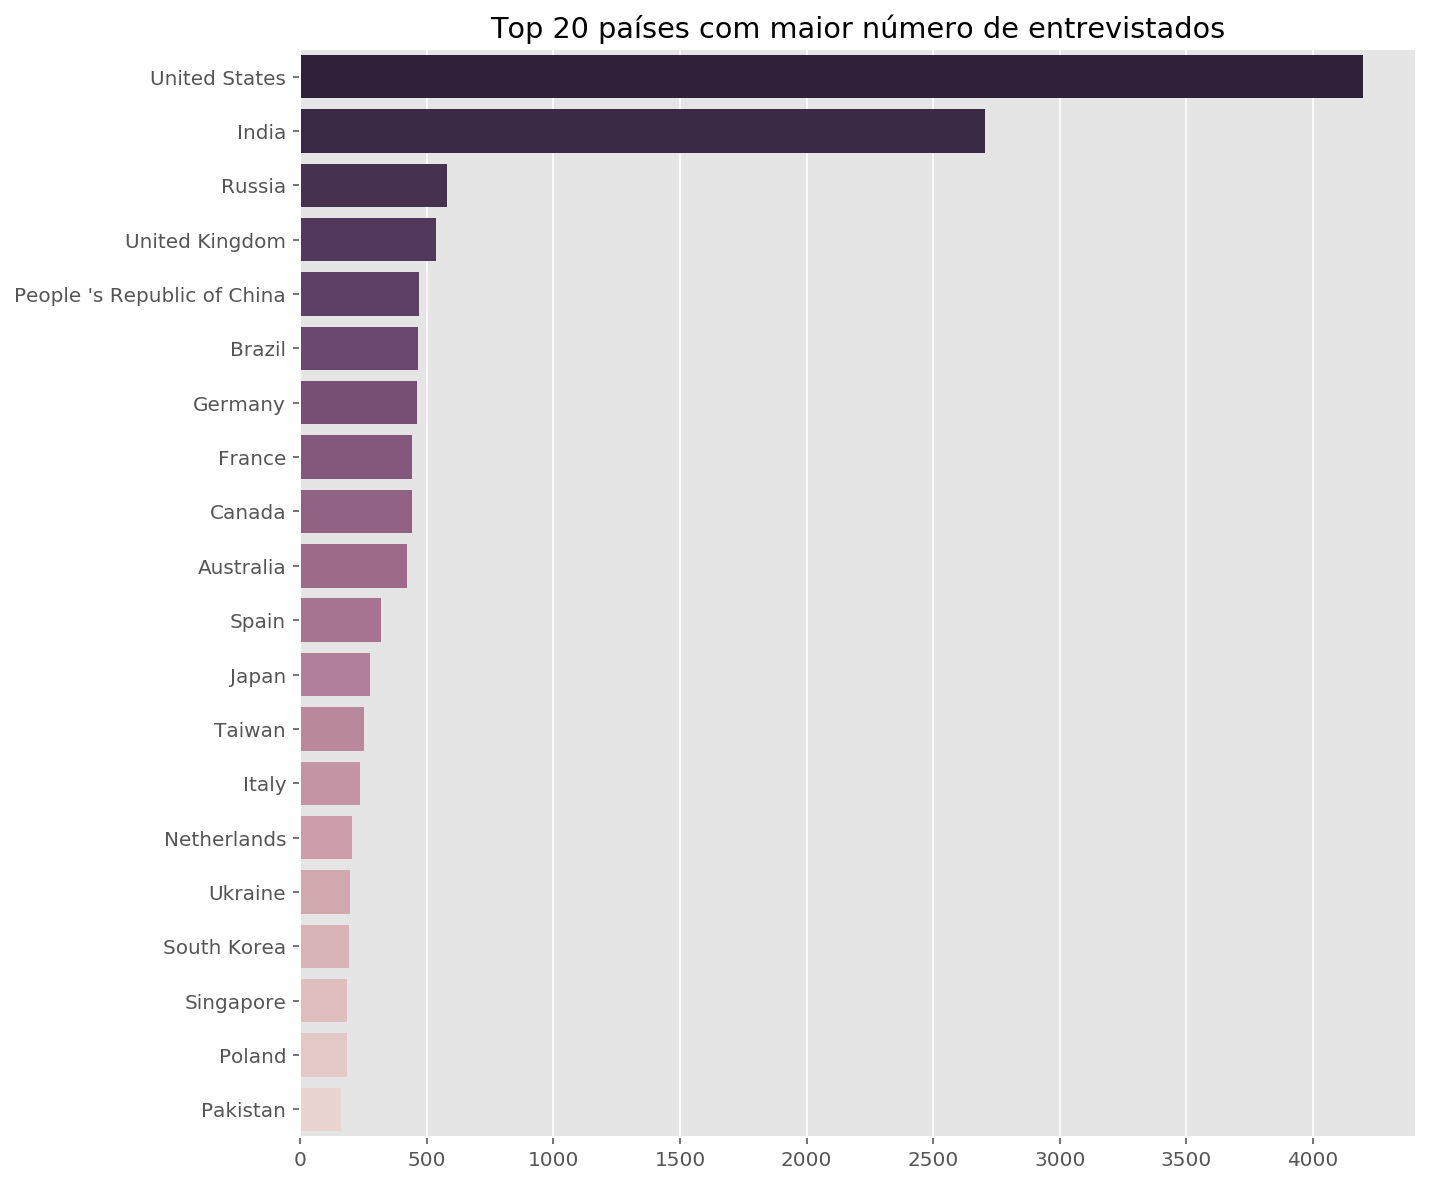

In [4]:
# Number of survey takers and accounted/non-accounted countries
print('Número total de entrevistados:', multiple_choice_df.shape[0])
print('Número total de países contabilizados:', multiple_choice_df.Country.nunique())
print("Número de países classificados como 'Other':", 171 - multiple_choice_df.Country.nunique())

# Exploring the survey-takers number
print('\nPaís com o maior número de entrevistados:', multiple_choice_df.Country.value_counts().index[0], 'com', \
      multiple_choice_df.Country.value_counts().values[0], 'entrevistados\n')

# Exclude 'Other' as country choice
no_other = multiple_choice_df[multiple_choice_df['Country'] != 'Other']

# Plotting top 20 countries by number of survey-takers
countries = no_other.Country.value_counts()[:20].to_frame()
sns.barplot(countries.Country, countries.index, palette = sns.cubehelix_palette(20, reverse=True))
plt.title('Top 20 países com maior número de entrevistados')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Entrevistado mais novo: 0.0 ano(s)
Entrevistado mais velho: 100.0 anos

Idade média dos entrevistados: 32.37
Idade mediana dos entrevistados: 30.0
Idade mais frequente: 25.0 



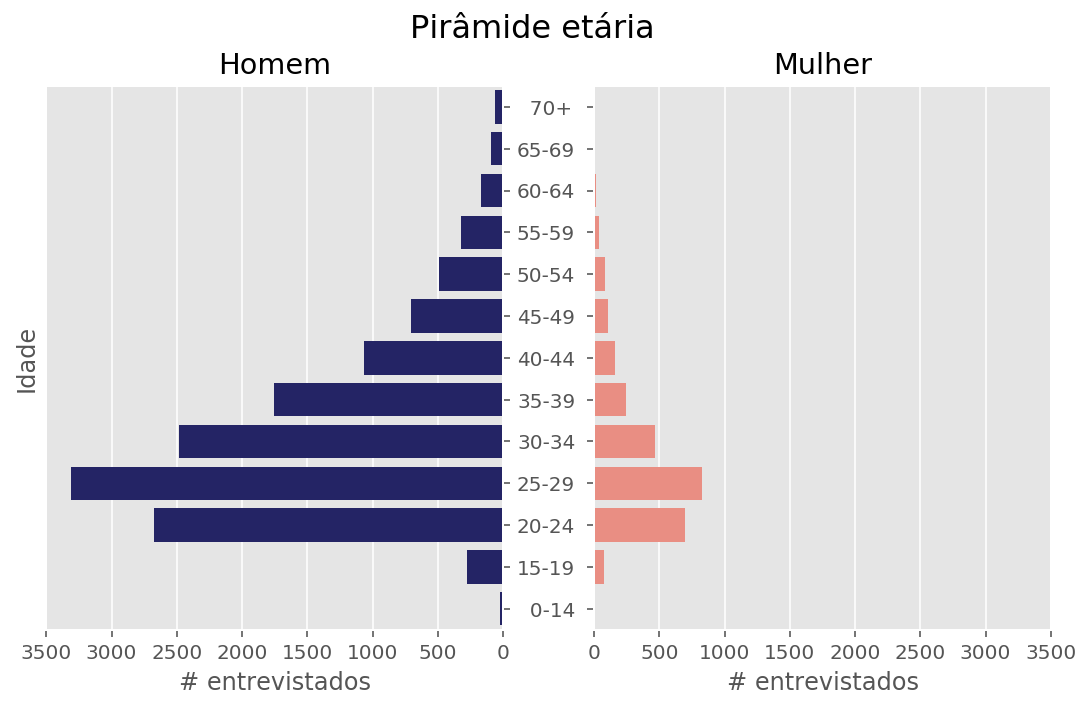

In [29]:
# Minimum and maximum ages
print('Entrevistado mais novo:', multiple_choice_df.Age.min(), 'ano(s)')
print('Entrevistado mais velho:', multiple_choice_df.Age.max(), 'anos')

# Exploring 
print('\nIdade média dos entrevistados:', round(multiple_choice_df.Age.mean(), 2))
print('Idade mediana dos entrevistados:', multiple_choice_df.Age.median())
print('Idade mais frequente:', multiple_choice_df.Age.mode()[0], '\n')

# Create two subplots with shared y-axis
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9,5))

# Group ages in bins
multiple_choice_df['AgeGroup'] = pd.cut(multiple_choice_df['Age'], \
                                        [0, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 101], \
                                        right=False, labels=['  0-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', \
                                                             '45-49', '50-54', '55-59', '60-64', '65-69', '  70+'])
 
# Bar chart for male
sns.countplot(y='AgeGroup', color='midnightblue', ax=axes[0], \
              order=['  70+', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', \
                      '35-39', '30-34', '25-29', '20-24', '15-19', '  0-14'],\
              data=multiple_choice_df[(multiple_choice_df.GenderSelect == 'Male')])
# Bar chart for female
sns.countplot(y='AgeGroup', color='salmon', ax=axes[1], \
              order=['  70+', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', \
                      '35-39', '30-34', '25-29', '20-24', '15-19', '  0-14'],\
              data = multiple_choice_df[(multiple_choice_df.GenderSelect == 'Female')])


# Matplotlib function for limiting axes
axes[0].set_xlim([0,3500])
axes[1].set_xlim([0,3500])

# Use Matplotlib function to invert the first chart 
axes[0].invert_xaxis()
 
# Use Matplotlib function to show tick labels in the middle 
axes[0].yaxis.tick_right()
 
# Use Matplotlib functions to label the axes and titles 
axes[0].set_title('Homem')
axes[1].set_title('Mulher')
axes[0].set(xlabel='# entrevistados', ylabel='Idade') 
axes[1].set(xlabel='# entrevistados', ylabel='') 
fig.suptitle('Pirâmide etária', fontsize=16)
 
plt.show()

In [47]:
multiple_choice_df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Gender Gap Analysis

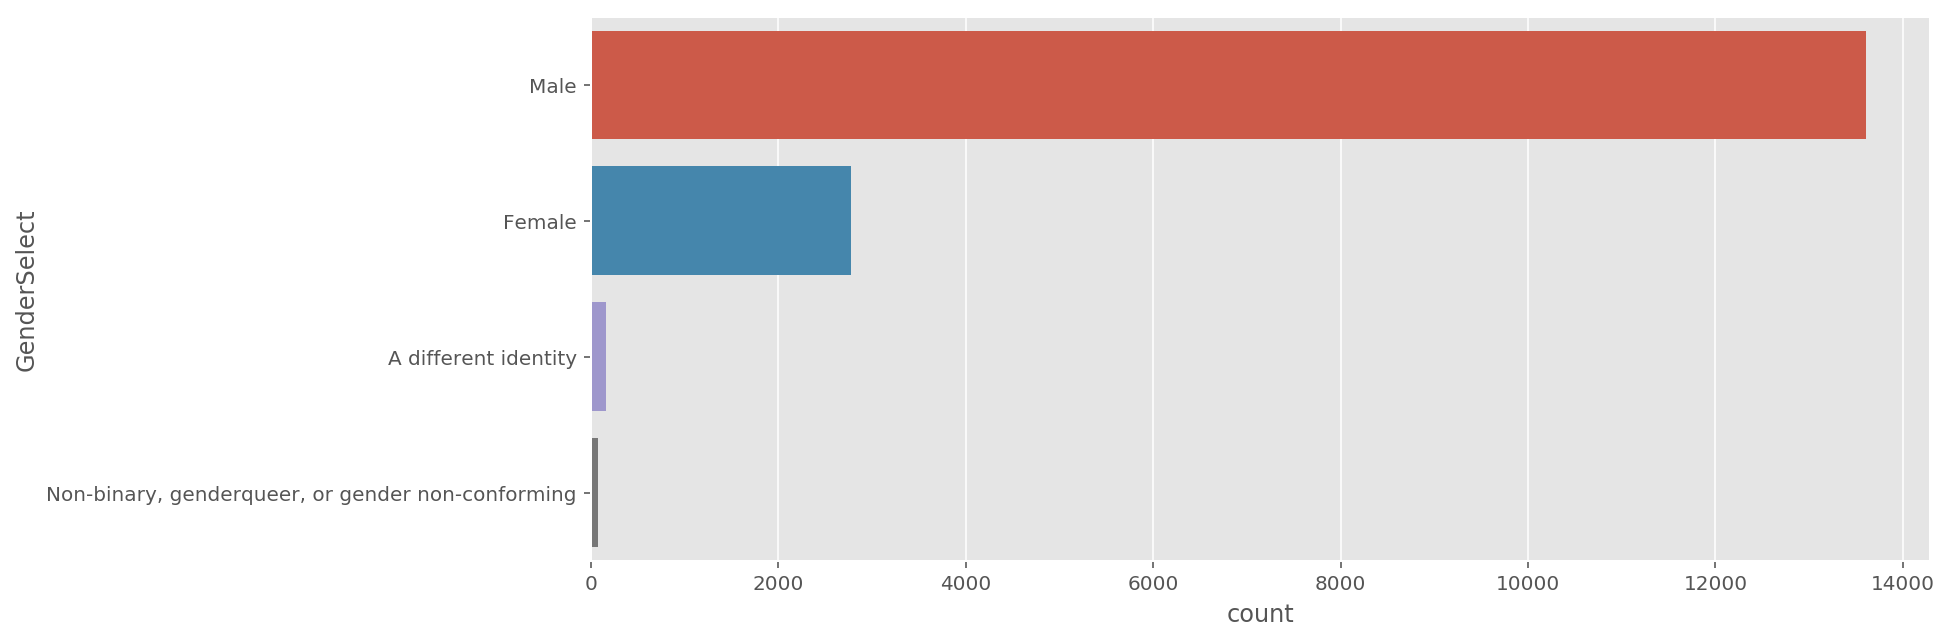

In [96]:
plt.subplots(figsize=(12,5))
sns.countplot(y=multiple_choice_df['GenderSelect'],order=multiple_choice_df['GenderSelect'].value_counts().index)
plt.show()

In [116]:
multiple_choice_df


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
